# Master python file V2

### Data pre-processing

In [14]:
conda update anaconda

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - anaconda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2021.11  |           py38_0           7 KB
    alabaster-0.7.12           |     pyhd3eb1b0_0          16 KB
    anaconda-custom            |           py38_1          35 KB
    anaconda-client-1.9.0      |   py38hecd8cb5_0         155 KB
    anaconda-project-0.10.2    |     pyhd3eb1b0_0         218 KB
    anyio-2.2.0                |   py38hecd8cb5_1         124 KB
    appdirs-1.4.4              |     pyhd3eb1b0_0          12 KB
    applaunchservices-0.2.1    |     pyhd3eb1b0_0           9 KB
    appnope-0.1.2              |py38hecd8cb5_1001          10 KB
    appscript-1.1.2            |   py38h9ed2024_0         129 KB
    argon2-cffi-20.1.0         |   py38h9ed2024_1          44 KB
    arrow-0.

In [2]:
#Import the required packages
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
from sklearn.model_selection import cross_validate

In [100]:
#Import the required dataset
data = pd.read_excel("Telco_customer_churn.xlsx")
demo = pd.read_excel("Telco_customer_churn_demographics copy.xlsx")
serv = pd.read_excel("Telco_customer_churn_services.xlsx")

#Renaming, merging, and dropping columns
data = data.rename(columns = {"CustomerID" : "Customer ID"})
data = pd.merge(data, demo[['Customer ID','Age', 'Married']], on = "Customer ID")
data = pd.merge(data, serv[['Customer ID', 'Number of Referrals', 'Avg Monthly GB Download', 'Streaming Music', 'Unlimited Data', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges']], on = 'Customer ID')
data = data.drop(columns = ["City", "Lat Long", "Count", "Country", "State", "Churn Reason", 'Total Charges', 'Churn Label'])
data = pd.merge(data, serv[['Customer ID','Total Charges', 'Total Revenue']], on = "Customer ID")
data = data.drop(columns = ['Customer ID'])

#Re-arranging the columns
cols = list(data.columns.values)
cols = ['Zip Code','Latitude','Longitude','Gender','Senior Citizen','Partner','Dependents','Tenure Months',
 'Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection',
 'Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges',
 'Churn Score','CLTV','Age','Married','Number of Referrals','Avg Monthly GB Download','Streaming Music',
 'Unlimited Data','Total Refunds','Total Extra Data Charges','Total Long Distance Charges','Total Charges',
 'Total Revenue','Churn Value']
data = data[cols]

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Zip Code                     7043 non-null   int64  
 1   Latitude                     7043 non-null   float64
 2   Longitude                    7043 non-null   float64
 3   Gender                       7043 non-null   object 
 4   Senior Citizen               7043 non-null   object 
 5   Partner                      7043 non-null   object 
 6   Dependents                   7043 non-null   object 
 7   Tenure Months                7043 non-null   int64  
 8   Phone Service                7043 non-null   object 
 9   Multiple Lines               7043 non-null   object 
 10  Internet Service             7043 non-null   object 
 11  Online Security              7043 non-null   object 
 12  Online Backup                7043 non-null   object 
 13  Device Protection 

In [6]:
#Split features from target variable
x = data.iloc[:, :34]
y = data.iloc[: , -1]

### Sub RQ-1: create a baseline model and compare that to different % FAMD models for both SVM and k-NN 

Baseline model:

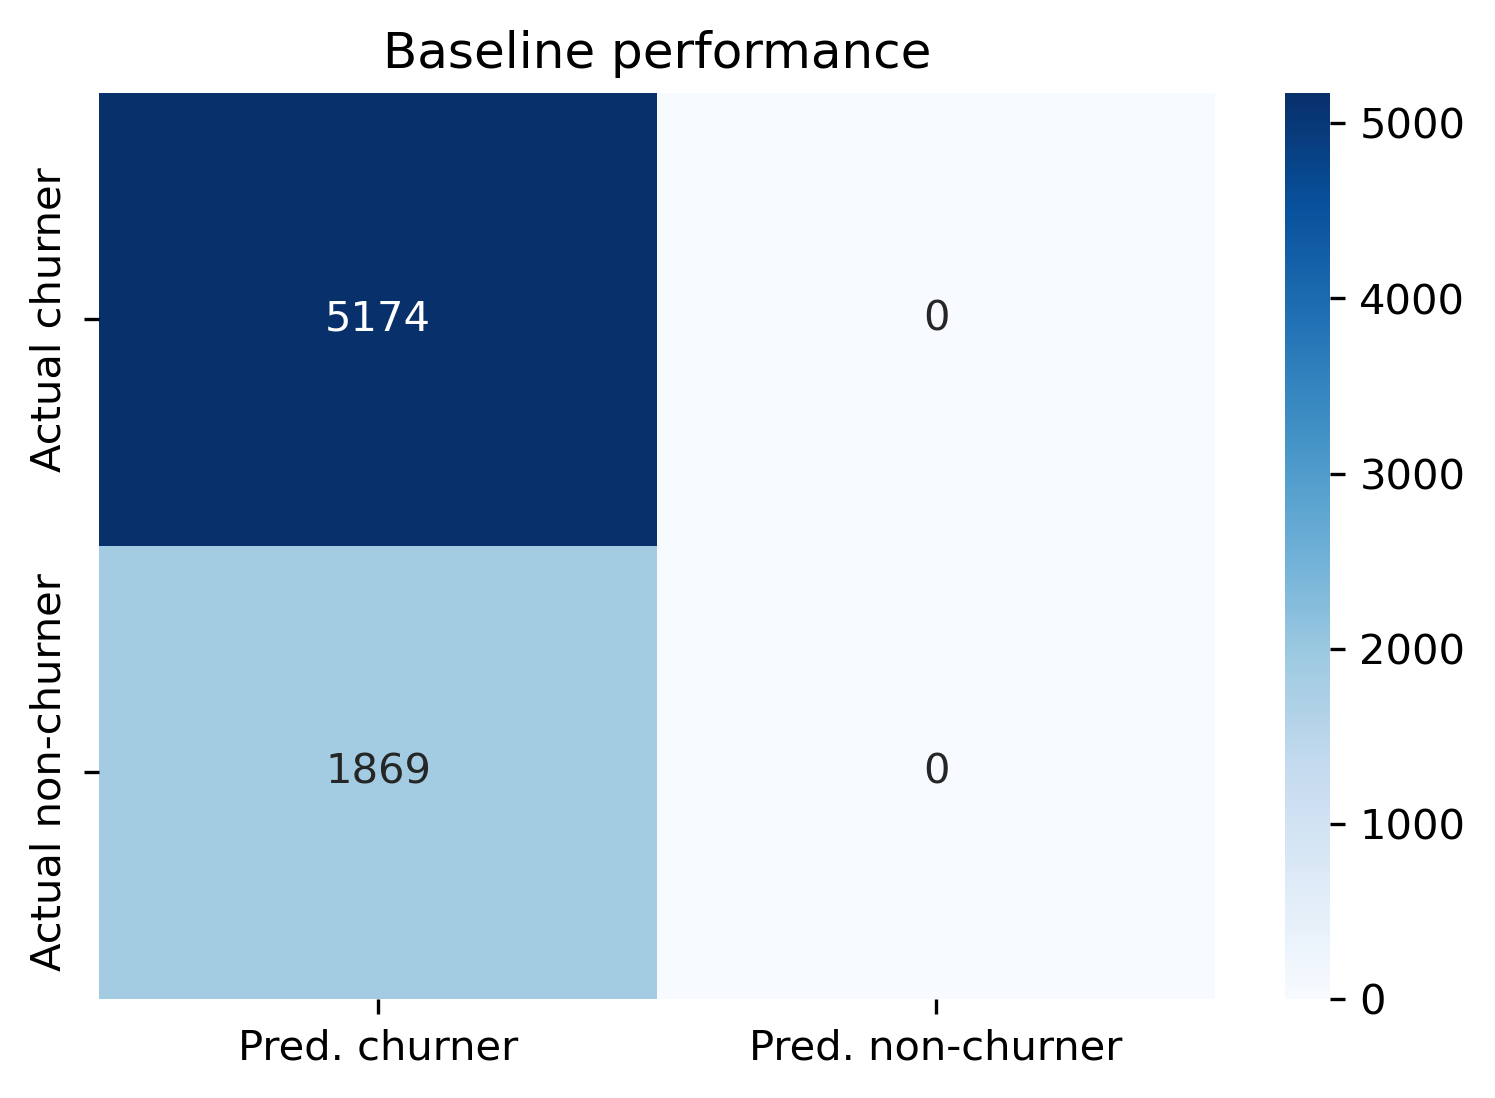

In [77]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(x, y)
y_baseline = dummy_clf.predict(x)
#classes = ["Non-Churner", "Churner"]
#cfm = confusion_matrix(y, y_baseline)
#df_cfm = pd.DataFrame(cfm, index = classes, columns = classes)
cmtx = pd.DataFrame(
    confusion_matrix(y, y_baseline), 
    index=['Actual churner', 'Actual non-churner'], 
    columns=['Pred. churner', 'Pred. non-churner'])

cmtx

plt.figure(dpi = 300)
ax = sn.heatmap(cmtx, annot=True, fmt = 'd',cmap='Blues')
ax.set_title("Baseline performance")
ax.figure.savefig("cfm.png")



#plt.title('Baseline Performance', fontsize = 10) # title with fontsize 20
#plt.xlabel('Predicted') # x-axis label with fontsize 15
#plt.ylabel('Actual') # y-axis label with fontsize 15
#plt.show()
#cfm_plot.figure.savefig("cfm.png")

In [53]:
#Fit and score dummy model
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(x, y)
y_baseline = dummy_clf.predict(x)
dummy_clf.score(y_baseline, y)
print(classification_report(y,y_baseline))
print(confusion_matrix(y, y_baseline))
#>>> X, y = make_classification(random_state=0)
#>>> X_train, X_test, y_train, y_test = train_test_split(X, y,
#...                                                     random_state=0)
#>>> clf = SVC(random_state=0)
#>>> clf.fit(X_train, y_train)
#SVC(random_state=0)
#>>> predictions = clf.predict(X_test)
#cm = confusion_matrix(y, y_baseline, labels=dummy_clf.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                             display_labels=dummy_clf.classes_)
#disp.plot()
#plt.savefig('baseline_performance.png')

#cfm_plot = plot_confusion_matrix(dummy_clf, x, y)
#cfm_plot.savefig("cfm.png")

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      5174
           1       0.00      0.00      0.00      1869

    accuracy                           0.73      7043
   macro avg       0.37      0.50      0.42      7043
weighted avg       0.54      0.73      0.62      7043

[[5174    0]
 [1869    0]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
y.value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

SMOTENC:

In [9]:
oversample = SMOTENC(categorical_features = [3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,24,27,28])
x, y = oversample.fit_resample(x, y)

In [10]:
y.value_counts()

1    5174
0    5174
Name: Churn Value, dtype: int64

pre-work FAMD models:

In [6]:
smotenc_x_rest, smotenc_x_test, smotenc_y_rest, smotenc_y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.20, random_state = 50)

In [7]:
smotenc_x_rest.to_csv(r'smotenc_x_rest.csv', index = False, header = True)
smotenc_x_test.to_csv(r'smotenc_x_test.csv', index = False, header = True)

In [8]:
#Train sets (x)
dim43_FAMD_train = pd.read_excel("dim43_FAMD_train.xlsx")
dim23_FAMD_train = pd.read_excel("dim23_FAMD_train.xlsx")
dim16_FAMD_train = pd.read_excel("dim16_FAMD_train.xlsx")
dim11_FAMD_train = pd.read_excel("dim11_FAMD_train.xlsx")
dim7_FAMD_train  = pd.read_excel("dim7_FAMD_train.xlsx")

#Test sets (x)
dim43_FAMD_test = pd.read_excel("dim43_FAMD_test.xlsx")
dim23_FAMD_test = pd.read_excel("dim23_FAMD_test.xlsx")
dim16_FAMD_test = pd.read_excel("dim16_FAMD_test.xlsx")
dim11_FAMD_test = pd.read_excel("dim11_FAMD_test.xlsx")
dim7_FAMD_test  = pd.read_excel("dim7_FAMD_test.xlsx")

SVM 10-fold cross validation on all FAMD sets:

In [9]:
skfold = StratifiedKFold(n_splits=10, shuffle=True)
svm_model = svm.SVC()
svm_scores_43FAMD = cross_val_score(svm_model, dim43_FAMD_train, smotenc_y_rest, cv=skfold)
svm_scores_43FAMD_f1 = cross_val_score(svm_model, dim43_FAMD_train, smotenc_y_rest, cv=skfold, scoring = 'f1')
svm_scores_43FAMD_re = cross_val_score(svm_model, dim43_FAMD_train, smotenc_y_rest, cv=skfold, scoring = 'f1')
svm_scores_43FAMD_pr = cross_val_score(svm_model, dim43_FAMD_train, smotenc_y_rest, cv=skfold, scoring = 'f1')

svm_scores_23FAMD = cross_val_score(svm_model, dim23_FAMD_train, smotenc_y_rest, cv=skfold)
svm_scores_23FAMD_f1 = cross_val_score(svm_model, dim23_FAMD_train, smotenc_y_rest, cv=skfold, scoring = 'f1')

svm_scores_16FAMD = cross_val_score(svm_model, dim16_FAMD_train, smotenc_y_rest, cv=skfold)
svm_scores_16FAMD_f1 = cross_val_score(svm_model, dim16_FAMD_train, smotenc_y_rest, cv=skfold, scoring = 'f1')

svm_scores_11FAMD = cross_val_score(svm_model, dim11_FAMD_train, smotenc_y_rest, cv=skfold)
svm_scores_11FAMD_f1 = cross_val_score(svm_model, dim11_FAMD_train, smotenc_y_rest, cv=skfold, scoring = 'f1')

svm_scores_7FAMD = cross_val_score(svm_model, dim7_FAMD_train, smotenc_y_rest, cv=skfold)
svm_scores_7FAMD_f1 = cross_val_score(svm_model, dim7_FAMD_train, smotenc_y_rest, cv=skfold, scoring = 'f1')

In [23]:
skfold = StratifiedKFold(n_splits=10, shuffle=True)
svm_model = svm.SVC()

svm_scores_43FAMD = cross_validate(svm_model, dim43_FAMD_train, smotenc_y_rest, cv=skfold,
                                   scoring=('accuracy', 'recall', 'precision', 'f1'), return_train_score=False)

svm_scores_23FAMD = cross_validate(svm_model, dim23_FAMD_train, smotenc_y_rest, cv=skfold,
                                   scoring=('accuracy', 'recall', 'precision', 'f1'), return_train_score=False)

svm_scores_16FAMD = cross_validate(svm.SVC(C = 10), dim16_FAMD_train, smotenc_y_rest, cv=skfold,
                                   scoring=('accuracy', 'recall', 'precision', 'f1'), return_train_score=False)

svm_scores_11FAMD = cross_validate(svm.SVC(C = 10), dim11_FAMD_train, smotenc_y_rest, cv=skfold,
                                   scoring=('accuracy', 'recall', 'precision', 'f1'), return_train_score=False)

svm_scores_7FAMD = cross_validate(svm.SVC(C = 50), dim7_FAMD_train, smotenc_y_rest, cv=skfold,
                                   scoring=('accuracy', 'recall', 'precision', 'f1'), return_train_score=False)

In [31]:
print("Mean Accuracy:")
print("43 dimensions:", round(np.mean(svm_scores_43FAMD['test_accuracy']),4))
print("23 dimensions:", round(np.mean(svm_scores_23FAMD['test_accuracy']),4))
print("16 dimensions:", round(np.mean(svm_scores_16FAMD['test_accuracy']),4))
print("11 dimensions:", round(np.mean(svm_scores_11FAMD['test_accuracy']),4))
print("7  dimensions:", round(np.mean(svm_scores_7FAMD['test_accuracy']),4))

print("\nMean Recall:")
print("43 dimensions:", round(np.mean(svm_scores_43FAMD['test_recall']),4))
print("23 dimensions:", round(np.mean(svm_scores_23FAMD['test_recall']),4))
print("16 dimensions:", round(np.mean(svm_scores_16FAMD['test_recall']),4))
print("11 dimensions:", round(np.mean(svm_scores_11FAMD['test_recall']),4))
print("7  dimensions:", round(np.mean(svm_scores_7FAMD['test_recall']),4))

print("\nMean Precision:")
print("43 dimensions:", round(np.mean(svm_scores_43FAMD['test_precision']),4))
print("23 dimensions:", round(np.mean(svm_scores_23FAMD['test_precision']),4))
print("16 dimensions:", round(np.mean(svm_scores_16FAMD['test_precision']),4))
print("11 dimensions:", round(np.mean(svm_scores_11FAMD['test_precision']),4))
print("7  dimensions:", round(np.mean(svm_scores_7FAMD['test_precision']),4))

print("\nMean F1-score:")
print("43 dimensions:", round(np.mean(svm_scores_43FAMD['test_f1']),4))
print("23 dimensions:", round(np.mean(svm_scores_23FAMD['test_f1']),4))
print("16 dimensions:", round(np.mean(svm_scores_16FAMD['test_f1']),4))
print("11 dimensions:", round(np.mean(svm_scores_11FAMD['test_f1']),4))
print("7  dimensions:", round(np.mean(svm_scores_7FAMD['test_f1']),4))

Mean Accuracy:
43 dimensions: 0.945
23 dimensions: 0.9407
16 dimensions: 0.9197
11 dimensions: 0.8834
7  dimensions: 0.8857

Mean Recall:
43 dimensions: 0.9548
23 dimensions: 0.9514
16 dimensions: 0.9311
11 dimensions: 0.8988
7  dimensions: 0.9002

Mean Precision:
43 dimensions: 0.9367
23 dimensions: 0.9314
16 dimensions: 0.9103
11 dimensions: 0.8721
7  dimensions: 0.8752

Mean F1-score:
43 dimensions: 0.9456
23 dimensions: 0.9413
16 dimensions: 0.9206
11 dimensions: 0.8852
7  dimensions: 0.8873


In [22]:
svm_model = svm.SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(kernel=kernel,C=C)
cv = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(estimator=svm_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(dim7_FAMD_train, smotenc_y_rest)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.887745 using {'C': 50, 'kernel': 'rbf'}
0.880521 (0.008952) with: {'C': 50, 'kernel': 'poly'}
0.887745 (0.009401) with: {'C': 50, 'kernel': 'rbf'}
0.781892 (0.006818) with: {'C': 50, 'kernel': 'sigmoid'}
0.880247 (0.007923) with: {'C': 10, 'kernel': 'poly'}
0.886283 (0.010718) with: {'C': 10, 'kernel': 'rbf'}
0.788411 (0.009443) with: {'C': 10, 'kernel': 'sigmoid'}
0.877324 (0.006841) with: {'C': 1.0, 'kernel': 'poly'}
0.882016 (0.006063) with: {'C': 1.0, 'kernel': 'rbf'}
0.779074 (0.014222) with: {'C': 1.0, 'kernel': 'sigmoid'}
0.862969 (0.006511) with: {'C': 0.1, 'kernel': 'poly'}
0.874405 (0.007002) with: {'C': 0.1, 'kernel': 'rbf'}
0.807165 (0.014179) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.809037 (0.008353) with: {'C': 0.01, 'kernel': 'poly'}
0.845960 (0.010170) with: {'C': 0.01, 'kernel': 'rbf'}
0.849443 (0.007584) with: {'C': 0.01, 'kernel': 'sigmoid'}


In [38]:
# define models and parameters
knn_model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(estimator=knn_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(dim7_FAMD_train, smotenc_y_rest)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.881333 using {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
0.852793 (0.006223) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.852793 (0.006223) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.871794 (0.010306) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.870441 (0.009646) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.872546 (0.013809) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.873198 (0.013465) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.873491 (0.013532) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.875635 (0.013029) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.875088 (0.011552) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.877842 (0.010182) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.877421

k-NN 10-fold cross validation on all FAMD sets:

In [39]:
skfold = StratifiedKFold(n_splits=10, shuffle=True)
knn_model = KNeighborsClassifier()

knn_scores_43FAMD = cross_validate(KNeighborsClassifier(metric = 'manhattan', n_neighbors = 7, weights = 'distance'),
                                   dim43_FAMD_train, smotenc_y_rest, cv=skfold,
                                   scoring=('accuracy', 'recall', 'precision', 'f1'), return_train_score=False)

knn_scores_23FAMD = cross_validate(KNeighborsClassifier(metric = 'manhattan', n_neighbors = 7, weights = 'distance'),
                                   dim23_FAMD_train, smotenc_y_rest, cv=skfold,
                                   scoring=('accuracy', 'recall', 'precision', 'f1'), return_train_score=False)

knn_scores_16FAMD = cross_validate(KNeighborsClassifier(metric = 'euclidean', n_neighbors = 9, weights = 'distance'),
                                   dim16_FAMD_train, smotenc_y_rest, cv=skfold,
                                   scoring=('accuracy', 'recall', 'precision', 'f1'), return_train_score=False)

knn_scores_11FAMD = cross_validate(KNeighborsClassifier(metric = 'manhattan', n_neighbors = 13, weights = 'distance'),
                                   dim11_FAMD_train, smotenc_y_rest, cv=skfold,
                                   scoring=('accuracy', 'recall', 'precision', 'f1'), return_train_score=False)

knn_scores_7FAMD = cross_validate(KNeighborsClassifier(metric = 'euclidean', n_neighbors = 17, weights = 'distance'),
                                   dim7_FAMD_train, smotenc_y_rest, cv=skfold,
                                   scoring=('accuracy', 'recall', 'precision', 'f1'), return_train_score=False)

In [40]:
print("Mean Accuracy:")
print("43 dimensions:", round(np.mean(knn_scores_43FAMD['test_accuracy']),4))
print("23 dimensions:", round(np.mean(knn_scores_23FAMD['test_accuracy']),4))
print("16 dimensions:", round(np.mean(knn_scores_16FAMD['test_accuracy']),4))
print("11 dimensions:", round(np.mean(knn_scores_11FAMD['test_accuracy']),4))
print("7  dimensions:", round(np.mean(knn_scores_7FAMD['test_accuracy']),4))

print("\nMean Recall:")
print("43 dimensions:", round(np.mean(knn_scores_43FAMD['test_recall']),4))
print("23 dimensions:", round(np.mean(knn_scores_23FAMD['test_recall']),4))
print("16 dimensions:", round(np.mean(knn_scores_16FAMD['test_recall']),4))
print("11 dimensions:", round(np.mean(knn_scores_11FAMD['test_recall']),4))
print("7  dimensions:", round(np.mean(knn_scores_7FAMD['test_recall']),4))

print("\nMean Precision:")
print("43 dimensions:", round(np.mean(knn_scores_43FAMD['test_precision']),4))
print("23 dimensions:", round(np.mean(knn_scores_23FAMD['test_precision']),4))
print("16 dimensions:", round(np.mean(knn_scores_16FAMD['test_precision']),4))
print("11 dimensions:", round(np.mean(knn_scores_11FAMD['test_precision']),4))
print("7  dimensions:", round(np.mean(knn_scores_7FAMD['test_precision']),4))

print("\nMean F1-score:")
print("43 dimensions:", round(np.mean(knn_scores_43FAMD['test_f1']),4))
print("23 dimensions:", round(np.mean(knn_scores_23FAMD['test_f1']),4))
print("16 dimensions:", round(np.mean(knn_scores_16FAMD['test_f1']),4))
print("11 dimensions:", round(np.mean(knn_scores_11FAMD['test_f1']),4))
print("7  dimensions:", round(np.mean(knn_scores_7FAMD['test_f1']),4))

Mean Accuracy:
43 dimensions: 0.8901
23 dimensions: 0.8864
16 dimensions: 0.8833
11 dimensions: 0.873
7  dimensions: 0.8798

Mean Recall:
43 dimensions: 0.9449
23 dimensions: 0.9456
16 dimensions: 0.9251
11 dimensions: 0.9038
7  dimensions: 0.9005

Mean Precision:
43 dimensions: 0.8517
23 dimensions: 0.8457
16 dimensions: 0.8539
11 dimensions: 0.8515
7  dimensions: 0.8648

Mean F1-score:
43 dimensions: 0.8958
23 dimensions: 0.8928
16 dimensions: 0.888
11 dimensions: 0.8768
7  dimensions: 0.8822


SVM models on all FAMD sets:

In [46]:
model = svm.SVC()

#43 dims
model.fit(dim43_FAMD_train, smotenc_y_rest)
y.pred_43 = model.predict(dim43_FAMD_test)
svmf1_43 = metrics.f1_score(smotenc_y_test, y.pred_43)

#23 dims
model.fit(dim23_FAMD_train, smotenc_y_rest)
y.pred_23 = model.predict(dim23_FAMD_test)
svmf1_23 = metrics.f1_score(smotenc_y_test, y.pred_23)

print("F1-score:")
print("43 dimensions:", svmf1_43)
print("23 dimensions:", svmf1_23)

print(classification_report(smotenc_y_test, y.pred_43))
print(classification_report(smotenc_y_test, y.pred_23))

F1-score:
43 dimensions: 0.8178217821782179
23 dimensions: 0.7988047808764939
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1035
           1       0.84      0.80      0.82      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1035
           1       0.82      0.77      0.80      1035

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070



In [47]:
model = svm.SVC(C = 10)

model.fit(dim16_FAMD_train, smotenc_y_rest)
y.pred_16 = model.predict(dim16_FAMD_test)
svmf1_16 = metrics.f1_score(smotenc_y_test, y.pred_16)

model.fit(dim11_FAMD_train, smotenc_y_rest)
y.pred_11 = model.predict(dim11_FAMD_test)
svmf1_11 = metrics.f1_score(smotenc_y_test, y.pred_11)

print("16 dimensions:", svmf1_16)
print("11 dimensions:", svmf1_11)
print(classification_report(smotenc_y_test, y.pred_16))
print(classification_report(smotenc_y_test, y.pred_11))

16 dimensions: 0.7572339382050024
11 dimensions: 0.8733997155049785
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1035
           1       0.77      0.75      0.76      1035

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1035
           1       0.86      0.89      0.87      1035

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



In [49]:
model = svm.SVC(C = 50)

model.fit(dim7_FAMD_train, smotenc_y_rest)
y.pred_7 = model.predict(dim7_FAMD_test)
svmf1_7 = metrics.f1_score(smotenc_y_test, y.pred_7)

print("7  dimensions:", svmf1_7)
print(classification_report(smotenc_y_test, y.pred_7))

7  dimensions: 0.8775413711583924
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1035
           1       0.86      0.90      0.88      1035

    accuracy                           0.87      2070
   macro avg       0.88      0.87      0.87      2070
weighted avg       0.88      0.87      0.87      2070



k-NN models on all FAMD sets

In [56]:
knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 7, weights = 'distance')

#43 dims
knn_model.fit(dim43_FAMD_train, smotenc_y_rest)
y_pred_43 = knn_model.predict(dim43_FAMD_test)
knnf1_43 = metrics.f1_score(smotenc_y_test, y_pred_43)

#23 dims
knn_model.fit(dim23_FAMD_train, smotenc_y_rest)
y_pred_23 = knn_model.predict(dim23_FAMD_test)
knnf1_23 = metrics.f1_score(smotenc_y_test, y_pred_23)

print(classification_report(smotenc_y_test, y_pred_43))
print(classification_report(smotenc_y_test, y_pred_23))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1035
           1       0.81      0.93      0.86      1035

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1035
           1       0.80      0.93      0.86      1035

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070



In [53]:
knn_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 9, weights = 'distance')

#16 dims
knn_model.fit(dim16_FAMD_train, smotenc_y_rest)
y_pred_16 = knn_model.predict(dim16_FAMD_test)
knnf1_16 = metrics.f1_score(smotenc_y_test, y_pred_16)

print(classification_report(smotenc_y_test, y_pred_16))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1035
           1       0.80      0.86      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



In [54]:
knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 13, weights = 'distance')

# 11 dims
knn_model.fit(dim11_FAMD_train, smotenc_y_rest)
y_pred_11 = knn_model.predict(dim11_FAMD_test)
knnf1_11 = metrics.f1_score(smotenc_y_test, y_pred_11)

print(classification_report(smotenc_y_test, y_pred_11))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1035
           1       0.85      0.91      0.88      1035

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



In [55]:
knn_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 17, weights = 'distance')

# 7 dims
knn_model.fit(dim7_FAMD_train, smotenc_y_rest)
y_pred_7 = knn_model.predict(dim7_FAMD_test)
knnf1_7 = metrics.f1_score(smotenc_y_test, y_pred_7)

print(classification_report(smotenc_y_test, y_pred_7))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1035
           1       0.85      0.89      0.87      1035

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



### Sub RQ-2: Do "correct, train on all clusters and test on clusters separetely" hybrid and compare outcomes to earlier models

In [11]:
total_data = x
total_data['target'] = y

In [12]:
x_train, x_test = train_test_split(total_data, stratify=total_data['target'], test_size=0.20, random_state = 100)

In [13]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

In [14]:
x_train_x = x_train.iloc[:, :34]
x_train_y = x_train.iloc[: , -1]

x_test_x = x_test.iloc[:, :34]
x_test_y = x_test.iloc[: , -1]

In [15]:
x_train_x.to_csv(r'x_train.csv', index = False, header = True)
x_test_x.to_csv(r'x_test.csv', index = False, header = True)

In [16]:
x23_FAMD_train = pd.read_excel("x23_FAMD_train.xlsx")
x23_FAMD_test = pd.read_excel("x23_FAMD_test.xlsx")

In [17]:
x23_FAMD_train['TV'] = x_train_y
x23_FAMD_test['TV'] = x_test_y

In [18]:
range_n_clusters = list (range(2,9))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x23_FAMD_test)
    centers = clusterer.cluster_centers_
    score = silhouette_score(x23_FAMD_test, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3783400471600687)
For n_clusters = 3, silhouette score is 0.2891405307177054)
For n_clusters = 4, silhouette score is 0.3083958964044177)
For n_clusters = 5, silhouette score is 0.22098348782445845)
For n_clusters = 6, silhouette score is 0.2029760947715082)
For n_clusters = 7, silhouette score is 0.20198278796720864)
For n_clusters = 8, silhouette score is 0.20420620136529624)


In [102]:
kmeans = KMeans(n_clusters=2)
train_clusters = kmeans.fit(x23_FAMD_train)
test_clusters = train_clusters.predict(x23_FAMD_test)

In [104]:
train_clusters.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [107]:
x23_FAMD_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dim.1    8278 non-null   float64
 1   Dim.2    8278 non-null   float64
 2   Dim.3    8278 non-null   float64
 3   Dim.4    8278 non-null   float64
 4   Dim.5    8278 non-null   float64
 5   Dim.6    8278 non-null   float64
 6   Dim.7    8278 non-null   float64
 7   Dim.8    8278 non-null   float64
 8   Dim.9    8278 non-null   float64
 9   Dim.10   8278 non-null   float64
 10  Dim.11   8278 non-null   float64
 11  TV       8278 non-null   int64  
 12  cluster  8278 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 808.5 KB


In [122]:
x23_FAMD_train.iloc[:, :11].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dim.1   8278 non-null   float64
 1   Dim.2   8278 non-null   float64
 2   Dim.3   8278 non-null   float64
 3   Dim.4   8278 non-null   float64
 4   Dim.5   8278 non-null   float64
 5   Dim.6   8278 non-null   float64
 6   Dim.7   8278 non-null   float64
 7   Dim.8   8278 non-null   float64
 8   Dim.9   8278 non-null   float64
 9   Dim.10  8278 non-null   float64
 10  Dim.11  8278 non-null   float64
dtypes: float64(11)
memory usage: 711.5 KB


In [20]:
x23_FAMD_train['cluster'] = train_clusters.labels_
x23_FAMD_test['cluster'] = test_clusters

In [21]:
train_x_set = x23_FAMD_train.iloc[:, :11]
train_x_set['cluster'] = x23_FAMD_train['cluster']
test_x_set = x23_FAMD_test.iloc[:, :11]
test_x_set['cluster'] = x23_FAMD_test['cluster']

train_y_set = x23_FAMD_train.iloc[:, -2]
test_y_set = x23_FAMD_test.iloc[:, -2]

In [22]:
cluster_0_train = x23_FAMD_train[x23_FAMD_train['cluster'] == 0]
cluster_1_train = x23_FAMD_train[x23_FAMD_train['cluster'] == 1]

cluster_0_test = x23_FAMD_test[x23_FAMD_test['cluster'] == 0]
cluster_1_test = x23_FAMD_test[x23_FAMD_test['cluster'] == 1]
#################################################################
cluster_0_x_train = cluster_0_train.iloc[:, :11]
cluster_1_x_train = cluster_1_train.iloc[:, :11]

cluster_0_y_train = cluster_0_train.iloc[:, -2]
cluster_1_y_train = cluster_1_train.iloc[:, -2]
#################################################################
cluster_0_x_test = cluster_0_test.iloc[:, :11]
cluster_1_x_test = cluster_1_test.iloc[:, :11]

cluster_0_y_test = cluster_0_test.iloc[:, -2]
cluster_1_y_test = cluster_1_test.iloc[:, -2]

In [23]:
cluster_0_x_test['cluster'] = cluster_0_test['cluster']
cluster_1_x_test['cluster'] = cluster_1_test['cluster']

In [24]:
svm_model = svm.SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(kernel=kernel,C=C)
cv = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(estimator=svm_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(train_x_set, train_y_set)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.886686 using {'C': 100, 'kernel': 'poly'}
0.886686 (0.010046) with: {'C': 100, 'kernel': 'poly'}
0.886177 (0.011020) with: {'C': 100, 'kernel': 'rbf'}
0.804890 (0.015367) with: {'C': 100, 'kernel': 'sigmoid'}
0.882358 (0.009565) with: {'C': 10, 'kernel': 'poly'}
0.885943 (0.011304) with: {'C': 10, 'kernel': 'rbf'}
0.805715 (0.016351) with: {'C': 10, 'kernel': 'sigmoid'}
0.879809 (0.009109) with: {'C': 1.0, 'kernel': 'poly'}
0.881277 (0.009036) with: {'C': 1.0, 'kernel': 'rbf'}
0.794339 (0.016601) with: {'C': 1.0, 'kernel': 'sigmoid'}
0.864502 (0.007502) with: {'C': 0.1, 'kernel': 'poly'}
0.876344 (0.009341) with: {'C': 0.1, 'kernel': 'rbf'}
0.832499 (0.010743) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.806686 (0.006492) with: {'C': 0.01, 'kernel': 'poly'}
0.850078 (0.011367) with: {'C': 0.01, 'kernel': 'rbf'}
0.857524 (0.010338) with: {'C': 0.01, 'kernel': 'sigmoid'}


In [26]:
svm_model = svm.SVC(C = 100, kernel = "poly")
svm_model.fit(train_x_set, train_y_set)

y_pred_R0 = svm_model.predict(cluster_0_x_test)
svmR0_acc = metrics.accuracy_score(cluster_0_y_test, y_pred_R0)
svmR0_f1 = metrics.f1_score(cluster_0_y_test, y_pred_R0)

y_pred_R1 = svm_model.predict(cluster_1_x_test)
svmR1_acc = metrics.accuracy_score(cluster_1_y_test, y_pred_R1)
svmR1_f1 = metrics.f1_score(cluster_1_y_test, y_pred_R1)

print("Results")
print(
    "R0 Accuracy:", svmR0_acc,
    "\nR1 Accuracy:", svmR1_acc
     )
print(
    "\nR0 F1_score:", svmR0_f1,
    "\nR1 F1_score:", svmR1_f1
     )

print(classification_report(cluster_0_y_test, y_pred_R0))
print(classification_report(cluster_1_y_test, y_pred_R1))

Results
R0 Accuracy: 0.8539898132427843 
R1 Accuracy: 0.8976897689768977

R0 F1_score: 0.8736532810969638 
R1 F1_score: 0.43636363636363634
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       763
           1       0.86      0.89      0.87      1004

    accuracy                           0.85      1767
   macro avg       0.85      0.85      0.85      1767
weighted avg       0.85      0.85      0.85      1767

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       272
           1       0.50      0.39      0.44        31

    accuracy                           0.90       303
   macro avg       0.72      0.67      0.69       303
weighted avg       0.89      0.90      0.89       303



In [27]:
# define models and parameters
knn_model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(estimator=knn_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(train_x_set, train_y_set)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.883491 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
0.848919 (0.006826) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.848919 (0.006826) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.870355 (0.010158) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.871196 (0.008881) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.872593 (0.007512) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.875430 (0.007900) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.874550 (0.007184) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.876751 (0.006463) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.876216 (0.007493) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.878903 (0.007295) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.876379

In [ ]:
train_x_set = x23_FAMD_train.iloc[:, :11]
train_x_set['cluster'] = x23_FAMD_train['cluster']
test_x_set = x23_FAMD_test.iloc[:, :11]
test_x_set['cluster'] = x23_FAMD_test['cluster']

train_y_set = x23_FAMD_train.iloc[:, -2]
test_y_set = x23_FAMD_test.iloc[:, -2]

In [93]:
svm_model = svm.SVC(C = 100, kernel = "poly")
svm_model.fit(train_x_set, train_y_set)
y_pred_svm = svm_model.predict(test_x_set)
print(classification_report(test_y_set, y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1035
           1       0.85      0.87      0.86      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [92]:
knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'distance')
knn_model.fit(train_x_set, train_y_set)
y_pred_knn = knn_model.predict(test_x_set)
print(classification_report(test_y_set, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1035
           1       0.84      0.89      0.87      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



In [28]:
knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 15, weights = 'distance')
knn_model.fit(train_x_set, train_y_set)

y_pred_R0 = knn_model.predict(cluster_0_x_test)
knnR0_acc = metrics.accuracy_score(cluster_0_y_test, y_pred_R0)
knnR0_f1 = metrics.f1_score(cluster_0_y_test, y_pred_R0)

y_pred_R1 = knn_model.predict(cluster_1_x_test)
knnR1_acc = metrics.accuracy_score(cluster_1_y_test, y_pred_R1)
knnR1_f1 = metrics.f1_score(cluster_1_y_test, y_pred_R1)

print("Results")
print(
    "R0 Accuracy:", knnR0_acc,
    "\nR1 Accuracy:", knnR1_acc,
     )
print(
    "\nR0 F1_score:", knnR0_f1,
    "\nR1 F1_score:", knnR1_f1,
     )

print(classification_report(cluster_0_y_test, y_pred_R0))
print(classification_report(cluster_1_y_test, y_pred_R1))

Results
R0 Accuracy: 0.8539898132427843 
R1 Accuracy: 0.9174917491749175

R0 F1_score: 0.8764367816091952 
R1 F1_score: 0.3902439024390244
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       763
           1       0.84      0.91      0.88      1004

    accuracy                           0.85      1767
   macro avg       0.86      0.84      0.85      1767
weighted avg       0.86      0.85      0.85      1767

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       272
           1       0.80      0.26      0.39        31

    accuracy                           0.92       303
   macro avg       0.86      0.63      0.67       303
weighted avg       0.91      0.92      0.90       303



### Sub RQ-3: Best performing hybrid of Sub RQ-2 and corresponding single classifier model will be used in the data decrease part of this sub question

single model:

In [29]:
RQ3_x = data.iloc[:, :34]
RQ3_y = data.iloc[: , -1]

In [96]:
x_rest_1, x_test_1, y_rest_1, y_test_1 = train_test_split(RQ3_x, RQ3_y,
                                                    stratify=RQ3_y, 
                                                    test_size=0.20, random_state = 12)
x_rest_2, x_test_2, y_rest_2, y_test_2 = train_test_split(RQ3_x, RQ3_y,
                                                    stratify=RQ3_y, 
                                                    test_size=0.40, random_state = 12)
x_rest_3, x_test_3, y_rest_3, y_test_3 = train_test_split(RQ3_x, RQ3_y,
                                                    stratify=RQ3_y, 
                                                    test_size=0.60, random_state = 12)

In [31]:
x_rest_1 = x_rest_1.reset_index(drop=True)
y_rest_1 = y_rest_1.reset_index(drop=True)

x_rest_2 = x_rest_2.reset_index(drop=True)
y_rest_2 = y_rest_2.reset_index(drop=True)

x_rest_3 = x_rest_3.reset_index(drop=True)
y_rest_3 = y_rest_3.reset_index(drop=True)

In [32]:
oversample1 = SMOTENC(categorical_features = [3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,24,27,28])
x_rest_1, y_rest_1 = oversample1.fit_resample(x_rest_1, y_rest_1)

oversample2 = SMOTENC(categorical_features = [3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,24,27,28])
x_rest_2, y_rest_2 = oversample2.fit_resample(x_rest_2, y_rest_2)

oversample3 = SMOTENC(categorical_features = [3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,24,27,28])
x_rest_3, y_rest_3 = oversample3.fit_resample(x_rest_3, y_rest_3)

In [33]:
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(x_rest_1, y_rest_1,
                                                    stratify=y_rest_1, 
                                                    test_size=0.20, random_state = 13)
x_train_60, x_test_60, y_train_60, y_test_60 = train_test_split(x_rest_2, y_rest_2,
                                                    stratify=y_rest_2, 
                                                    test_size=0.20, random_state = 13)
x_train_40, x_test_40, y_train_40, y_test_40 = train_test_split(x_rest_3, y_rest_3,
                                                    stratify=y_rest_3, 
                                                    test_size=0.20, random_state = 13)

In [34]:
x_train_80 = x_train_80.reset_index(drop=True)
y_train_80 = y_train_80.reset_index(drop=True)
x_test_80 = x_test_80.reset_index(drop=True)
y_test_80 = y_test_80.reset_index(drop=True)

x_train_60 = x_train_60.reset_index(drop=True)
y_train_60 = y_train_60.reset_index(drop=True)
x_test_60 = x_test_60.reset_index(drop=True)
y_test_60 = y_test_60.reset_index(drop=True)

x_train_40 = x_train_40.reset_index(drop=True)
y_train_40 = y_train_40.reset_index(drop=True)
x_test_40 = x_test_40.reset_index(drop=True)
y_test_40 = y_test_40.reset_index(drop=True)

In [35]:
x_train_80.to_csv(r'x_train_80.csv', index = False, header = True)
x_test_80.to_csv(r'x_test_80.csv', index = False, header = True)

x_train_60.to_csv(r'x_train_60.csv', index = False, header = True)
x_test_60.to_csv(r'x_test_60.csv', index = False, header = True)

x_train_40.to_csv(r'x_train_40.csv', index = False, header = True)
x_test_40.to_csv(r'x_test_40.csv', index = False, header = True)

In [36]:
#We only use 11 dimensions, since this yields the best results is sub RQ-1
#Train sets (x)
FAMD_train_80 = pd.read_excel("FAMD_train_80.xlsx")
FAMD_train_60 = pd.read_excel("FAMD_train_60.xlsx")
FAMD_train_40 = pd.read_excel("FAMD_train_40.xlsx")

#Test sets (x)
FAMD_test_80 = pd.read_excel("FAMD_test_80.xlsx")
FAMD_test_60 = pd.read_excel("FAMD_test_60.xlsx")
FAMD_test_40 = pd.read_excel("FAMD_test_40.xlsx")

In [317]:
skfold = StratifiedKFold(n_splits=10, shuffle=True)
knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 13, weights = 'distance')

knn_scores_FTR80 = cross_validate(KNeighborsClassifier(metric = 'manhattan', n_neighbors = 7,
                                     weights = 'distance'), FAMD_train_80, y_train_80,
                                     cv=skfold,scoring=('accuracy', 'recall', 'precision', 'f1'), 
                                     return_train_score=False)
knn_scores_FTR60 = cross_validate(KNeighborsClassifier(metric = 'manhattan', n_neighbors = 7,
                                     weights = 'distance'), FAMD_train_60, y_train_60,
                                     cv=skfold,scoring=('accuracy', 'recall', 'precision', 'f1'), 
                                     return_train_score=False)
knn_scores_FTR40 = cross_validate(KNeighborsClassifier(metric = 'manhattan', n_neighbors = 7,
                                     weights = 'distance'), FAMD_train_40, y_train_40,
                                     cv=skfold,scoring=('accuracy', 'recall', 'precision', 'f1'), 
                                     return_train_score=False)

In [318]:
print("Mean Accuracy:")
print("80%:", round(np.mean(knn_scores_FTR80['test_accuracy']),4))
print("60%:", round(np.mean(knn_scores_FTR60['test_accuracy']),4))
print("40%:", round(np.mean(knn_scores_FTR40['test_accuracy']),4))

print("\nMean Recall:")
print("80%:", round(np.mean(knn_scores_FTR80['test_recall']),4))
print("60%:", round(np.mean(knn_scores_FTR60['test_recall']),4))
print("40%:", round(np.mean(knn_scores_FTR40['test_recall']),4))

print("\nMean Precision:")
print("80%:", round(np.mean(knn_scores_FTR80['test_precision']),4))
print("60%:", round(np.mean(knn_scores_FTR60['test_precision']),4))
print("40%:", round(np.mean(knn_scores_FTR40['test_precision']),4))

print("\nMean F1-score:")
print("80%:", round(np.mean(knn_scores_FTR80['test_f1']),4))
print("60%:", round(np.mean(knn_scores_FTR60['test_f1']),4))
print("40%:", round(np.mean(knn_scores_FTR40['test_f1']),4))



Mean Accuracy:
80%: 0.8781
60%: 0.8737
40%: 0.8662

Mean Recall:
80%: 0.9058
60%: 0.9094
40%: 0.8973

Mean Precision:
80%: 0.8585
60%: 0.8493
40%: 0.845

Mean F1-score:
80%: 0.8814
60%: 0.8782
40%: 0.8701


In [39]:
# define models and parameters
knn_model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(estimator=knn_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(FAMD_train_40, y_train_40)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.881900 using {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
0.847829 (0.013374) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.847829 (0.013374) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.873929 (0.012825) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.874852 (0.012485) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.877593 (0.012084) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.880259 (0.011538) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.872090 (0.014340) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.874596 (0.013254) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.871209 (0.012405) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.873061 (0.013761) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.868909

In [40]:
knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 8, weights = 'distance')
knn_model.fit(FAMD_train_80, y_train_80)
y.pred_80p = knn_model.predict(FAMD_test_80)
knn_f1_80p = metrics.accuracy_score(y_test_80, y.pred_80p)

In [41]:
knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 7, weights = 'distance')
knn_model.fit(FAMD_train_60, y_train_60)
y.pred_60p = knn_model.predict(FAMD_test_60)
knn_f1_60p = metrics.accuracy_score(y_test_60, y.pred_60p)

In [42]:
knn_model = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 13, weights = 'distance')
knn_model.fit(FAMD_train_40, y_train_40)
y.pred_40p = knn_model.predict(FAMD_test_40)
knn_f1_40p = metrics.accuracy_score(y_test_40, y.pred_40p)

In [43]:
print("k-NN results on test set")
print("F1-score:")
print("80%:", knn_f1_80p)
print("60%:", knn_f1_60p)
print("40%:", knn_f1_40p)

k-NN results on test set
F1-score:
80%: 0.8671497584541062
60%: 0.822866344605475
40%: 0.6135265700483091


In [86]:
print(classification_report(y_test_40, y.pred_40p))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58       414
           1       0.60      0.70      0.64       414

    accuracy                           0.61       828
   macro avg       0.62      0.61      0.61       828
weighted avg       0.62      0.61      0.61       828



k-means + k-nn hyrbid on less data

In [55]:
total_data_q3 = x
total_data_q3['target'] = y

In [56]:
x_train_80, x_test_80 = train_test_split(total_data_q3, stratify=total_data_q3['target'], test_size=0.20, random_state = 100)
x_train_60, x_test_60 = train_test_split(total_data_q3, stratify=total_data_q3['target'], test_size=0.40, random_state = 100)
x_train_40, x_test_40 = train_test_split(total_data_q3, stratify=total_data_q3['target'], test_size=0.60, random_state = 100)

In [57]:
x_train_h1, x_test_h1 = train_test_split(x_train_80, stratify=x_train_80['target'], test_size=0.20, random_state = 101)
x_train_h2, x_test_h2 = train_test_split(x_train_60, stratify=x_train_60['target'], test_size=0.20, random_state = 101)
x_train_h3, x_test_h3 = train_test_split(x_train_40, stratify=x_train_40['target'], test_size=0.20, random_state = 101)

In [58]:
x_train_h1 = x_train_h1.reset_index(drop=True)
x_train_h2 = x_train_h2.reset_index(drop=True)
x_train_h3 = x_train_h3.reset_index(drop=True)

x_test_h1 = x_test_h1.reset_index(drop=True)
x_test_h2 = x_test_h2.reset_index(drop=True)
x_test_h3 = x_test_h3.reset_index(drop=True)

In [59]:
x_train_h1_x = x_train_h1.iloc[:, :34]
x_train_h2_x = x_train_h2.iloc[:, :34]
x_train_h3_x = x_train_h3.iloc[:, :34]

x_train_h1_y = x_train_h1.iloc[: , -1]
x_train_h2_y = x_train_h2.iloc[: , -1]
x_train_h3_y = x_train_h3.iloc[: , -1]

x_test_h1_x = x_test_h1.iloc[:, :34]
x_test_h2_x = x_test_h2.iloc[:, :34]
x_test_h3_x = x_test_h3.iloc[:, :34]

x_test_h1_y = x_test_h1.iloc[: , -1]
x_test_h2_y = x_test_h2.iloc[: , -1]
x_test_h3_y = x_test_h3.iloc[: , -1]

In [60]:
x_train_h1_x.to_csv(r'x_train_h1.csv', index = False, header = True)
x_train_h2_x.to_csv(r'x_train_h2.csv', index = False, header = True)
x_train_h3_x.to_csv(r'x_train_h3.csv', index = False, header = True)

x_test_h1_x.to_csv(r'x_test_h1.csv', index = False, header = True)
x_test_h2_x.to_csv(r'x_test_h2.csv', index = False, header = True)
x_test_h3_x.to_csv(r'x_test_h3.csv', index = False, header = True)

In [61]:
x23_h1_FAMD_train = pd.read_excel("FAMD_train_h1.xlsx")
x23_h2_FAMD_train = pd.read_excel("FAMD_train_h2.xlsx")
x23_h3_FAMD_train = pd.read_excel("FAMD_train_h3.xlsx")

x23_h1_FAMD_test = pd.read_excel("FAMD_test_h1.xlsx")
x23_h2_FAMD_test = pd.read_excel("FAMD_test_h2.xlsx")
x23_h3_FAMD_test = pd.read_excel("FAMD_test_h3.xlsx")

In [62]:
x23_h1_FAMD_train['TV'] = x_train_h1_y
x23_h2_FAMD_train['TV'] = x_train_h2_y
x23_h3_FAMD_train['TV'] = x_train_h3_y

x23_h1_FAMD_test['TV'] = x_test_h1_y
x23_h2_FAMD_test['TV'] = x_test_h2_y
x23_h3_FAMD_test['TV'] = x_test_h3_y

In [63]:
x23_h1_FAMD_test

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,TV
0,0.123907,0.098134,-6.263347,-0.516887,1.461642,0.762648,-0.944801,0.079205,-0.481739,-0.749315,0.154857,0
1,-3.097268,5.125064,1.756181,-2.285485,-1.254556,-0.058638,-0.494155,-0.534820,-2.397799,0.412608,-0.014583,1
2,-2.222738,1.010217,1.830275,3.087226,-2.640026,-0.288603,-0.357030,-0.928804,0.715699,-0.674770,-1.430197,1
3,-0.881049,-3.056243,0.485497,-2.235154,0.375044,-0.015976,0.161253,-0.250794,-0.274108,1.131109,-1.110288,1
4,-1.551555,1.197473,0.648106,-1.965781,-1.620359,0.139597,1.801351,-1.023318,0.752749,-0.267694,0.634550,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1651,0.300865,-1.869276,-4.365030,3.890191,-0.337820,2.291362,0.410986,-0.565979,-0.555479,0.372170,-0.218022,0
1652,-1.416144,3.570277,-4.664826,-1.080627,-0.171237,1.911640,-3.105359,-0.998365,1.291612,-0.338588,-2.508901,0
1653,-0.455608,-2.293814,0.276362,1.391713,-0.093332,-0.437166,1.208529,-0.140250,0.106498,-0.817467,-0.909067,1
1654,7.687386,-0.170843,0.438473,1.306781,-0.595749,0.076776,0.092988,0.263014,0.564753,-0.513057,-0.448002,0


In [64]:
kmeans = KMeans(n_clusters=2)
train_clusters_h1 = kmeans.fit(x23_h1_FAMD_train)
test_clusters_h1 = train_clusters.predict(x23_h1_FAMD_test)

In [65]:
kmeans = KMeans(n_clusters=2)
train_clusters_h2 = kmeans.fit(x23_h2_FAMD_train)
test_clusters_h2 = train_clusters.predict(x23_h2_FAMD_test)

In [66]:
kmeans = KMeans(n_clusters=2)
train_clusters_h3 = kmeans.fit(x23_h3_FAMD_train)
test_clusters_h3 = train_clusters.predict(x23_h3_FAMD_test)

In [67]:
x23_h1_FAMD_train['cluster'] = train_clusters_h1.labels_
x23_h2_FAMD_train['cluster'] = train_clusters_h2.labels_
x23_h3_FAMD_train['cluster'] = train_clusters_h3.labels_

x23_h1_FAMD_test['cluster'] = test_clusters_h1
x23_h2_FAMD_test['cluster'] = test_clusters_h2
x23_h3_FAMD_test['cluster'] = test_clusters_h3

In [68]:
train_x_set_h1 = x23_h1_FAMD_train.iloc[:, :11]
train_x_set_h1['cluster'] = x23_h1_FAMD_train['cluster']
test_x_set_h1 = x23_h1_FAMD_test.iloc[:, :11]
test_x_set_h1['cluster'] = x23_h1_FAMD_test['cluster']

train_y_set_h1 = x23_h1_FAMD_train.iloc[:, -2]
test_y_set_h1 = x23_h1_FAMD_test.iloc[:, -2]
#######################################################
train_x_set_h2 = x23_h2_FAMD_train.iloc[:, :11]
train_x_set_h2['cluster'] = x23_h2_FAMD_train['cluster']
test_x_set_h2 = x23_h2_FAMD_test.iloc[:, :11]
test_x_set_h2['cluster'] = x23_h2_FAMD_test['cluster']

train_y_set_h2 = x23_h2_FAMD_train.iloc[:, -2]
test_y_set_h2 = x23_h2_FAMD_test.iloc[:, -2]
#######################################################
train_x_set_h3 = x23_h3_FAMD_train.iloc[:, :11]
train_x_set_h3['cluster'] = x23_h3_FAMD_train['cluster']
test_x_set_h3 = x23_h3_FAMD_test.iloc[:, :11]
test_x_set_h3['cluster'] = x23_h3_FAMD_test['cluster']

train_y_set_h3 = x23_h3_FAMD_train.iloc[:, -2]
test_y_set_h3 = x23_h3_FAMD_test.iloc[:, -2]

In [88]:
test_x_set_h1

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,cluster
0,0.123907,0.098134,-6.263347,-0.516887,1.461642,0.762648,-0.944801,0.079205,-0.481739,-0.749315,0.154857,0
1,-3.097268,5.125064,1.756181,-2.285485,-1.254556,-0.058638,-0.494155,-0.534820,-2.397799,0.412608,-0.014583,0
2,-2.222738,1.010217,1.830275,3.087226,-2.640026,-0.288603,-0.357030,-0.928804,0.715699,-0.674770,-1.430197,0
3,-0.881049,-3.056243,0.485497,-2.235154,0.375044,-0.015976,0.161253,-0.250794,-0.274108,1.131109,-1.110288,0
4,-1.551555,1.197473,0.648106,-1.965781,-1.620359,0.139597,1.801351,-1.023318,0.752749,-0.267694,0.634550,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1651,0.300865,-1.869276,-4.365030,3.890191,-0.337820,2.291362,0.410986,-0.565979,-0.555479,0.372170,-0.218022,0
1652,-1.416144,3.570277,-4.664826,-1.080627,-0.171237,1.911640,-3.105359,-0.998365,1.291612,-0.338588,-2.508901,0
1653,-0.455608,-2.293814,0.276362,1.391713,-0.093332,-0.437166,1.208529,-0.140250,0.106498,-0.817467,-0.909067,0
1654,7.687386,-0.170843,0.438473,1.306781,-0.595749,0.076776,0.092988,0.263014,0.564753,-0.513057,-0.448002,1


In [69]:
cluster_0_test_h1 = x23_h1_FAMD_test[x23_h1_FAMD_test['cluster'] == 0]
cluster_1_test_h1 = x23_h1_FAMD_test[x23_h1_FAMD_test['cluster'] == 1]

cluster_0_x_test_h1 = cluster_0_test_h1.iloc[:, :11]
cluster_1_x_test_h1 = cluster_1_test_h1.iloc[:, :11]

cluster_0_y_test_h1 = cluster_0_test_h1.iloc[:, -2]
cluster_1_y_test_h1 = cluster_1_test_h1.iloc[:, -2]
#################################################################
cluster_0_test_h2 = x23_h2_FAMD_test[x23_h2_FAMD_test['cluster'] == 0]
cluster_1_test_h2 = x23_h2_FAMD_test[x23_h2_FAMD_test['cluster'] == 1]

cluster_0_x_test_h2 = cluster_0_test_h2.iloc[:, :11]
cluster_1_x_test_h2 = cluster_1_test_h2.iloc[:, :11]

cluster_0_y_test_h2 = cluster_0_test_h2.iloc[:, -2]
cluster_1_y_test_h2 = cluster_1_test_h2.iloc[:, -2]
#################################################################
cluster_0_test_h3 = x23_h3_FAMD_test[x23_h3_FAMD_test['cluster'] == 0]
cluster_1_test_h3 = x23_h3_FAMD_test[x23_h3_FAMD_test['cluster'] == 1]

cluster_0_x_test_h3 = cluster_0_test_h3.iloc[:, :11]
cluster_1_x_test_h3 = cluster_1_test_h3.iloc[:, :11]

cluster_0_y_test_h3 = cluster_0_test_h3.iloc[:, -2]
cluster_1_y_test_h3 = cluster_1_test_h3.iloc[:, -2]

In [70]:
cluster_0_x_test_h1['cluster'] = cluster_0_test_h1['cluster']
cluster_1_x_test_h1['cluster'] = cluster_1_test_h1['cluster']

cluster_0_x_test_h2['cluster'] = cluster_0_test_h2['cluster']
cluster_1_x_test_h2['cluster'] = cluster_1_test_h2['cluster']

cluster_0_x_test_h3['cluster'] = cluster_0_test_h3['cluster']
cluster_1_x_test_h3['cluster'] = cluster_1_test_h3['cluster']

In [73]:
# define models and parameters
knn_model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(estimator=knn_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(train_x_set_h3, train_y_set_h3)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.877087 using {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.839140 (0.020353) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.839140 (0.020353) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.865516 (0.013116) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.868002 (0.012049) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.870918 (0.015475) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.873092 (0.014303) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.871826 (0.017141) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.875862 (0.014755) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.871239 (0.020006) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.874867 (0.018728) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.867977 

Train on whole dataset and test on whole dataset

In [89]:
knn_model_h1 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 13, weights = 'distance')
knn_model_h1.fit(train_x_set_h1, train_y_set_h1)
y_pred_all_h1 = knn_model_h1.predict(test_x_set_h1)
print(classification_report(test_y_set_h1, y_pred_all_h1))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       828
           1       0.72      0.82      0.76       828

    accuracy                           0.75      1656
   macro avg       0.75      0.75      0.75      1656
weighted avg       0.75      0.75      0.75      1656



In [90]:
knn_model_h2 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 17, weights = 'distance')
knn_model_h2.fit(train_x_set_h2, train_y_set_h2)
y_pred_all_h2 = knn_model_h2.predict(test_x_set_h2)
print(classification_report(test_y_set_h2, y_pred_all_h2))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70       621
           1       0.70      0.82      0.75       621

    accuracy                           0.73      1242
   macro avg       0.74      0.73      0.73      1242
weighted avg       0.74      0.73      0.73      1242



In [91]:
knn_model_h3 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights = 'distance')
knn_model_h3.fit(train_x_set_h3, train_y_set_h3)
y_pred_all_h3 = knn_model_h3.predict(test_x_set_h3)
print(classification_report(test_y_set_h3, y_pred_all_h3))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       414
           1       0.67      0.67      0.67       414

    accuracy                           0.67       828
   macro avg       0.67      0.67      0.67       828
weighted avg       0.67      0.67      0.67       828



In [82]:
knn_model_h1 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 13, weights = 'distance')
knn_model_h1.fit(train_x_set_h1, train_y_set_h1)

#h1
y_pred_R0_h1 = knn_model_h1.predict(cluster_0_x_test_h1)
y_pred_R1_h1 = knn_model_h1.predict(cluster_1_x_test_h1)
y_pred_all_h1 = knn_model_h1.predict(test_x_set_h1)

In [75]:
knn_model_h2 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 17, weights = 'distance')
knn_model_h2.fit(train_x_set_h2, train_y_set_h2)

#h2
y_pred_R0_h2 = knn_model_h2.predict(cluster_0_x_test_h2)
y_pred_R1_h2 = knn_model_h2.predict(cluster_1_x_test_h2)

In [76]:
knn_model_h3 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights = 'distance')
knn_model_h3.fit(train_x_set_h3, train_y_set_h3)

#h3
y_pred_R0_h3 = knn_model_h3.predict(cluster_0_x_test_h3)
y_pred_R1_h3 = knn_model_h3.predict(cluster_1_x_test_h3)

In [83]:
print(classification_report(cluster_0_y_test_h1, y_pred_R0_h1))
print(classification_report(cluster_1_y_test_h1, y_pred_R1_h1))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       618
           1       0.72      0.84      0.77       802

    accuracy                           0.72      1420
   macro avg       0.73      0.70      0.71      1420
weighted avg       0.72      0.72      0.72      1420

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       210
           1       1.00      0.04      0.07        26

    accuracy                           0.89       236
   macro avg       0.95      0.52      0.51       236
weighted avg       0.91      0.89      0.85       236



In [80]:
print(classification_report(cluster_0_y_test_h2, y_pred_R0_h2))
print(classification_report(cluster_1_y_test_h2, y_pred_R1_h2))

              precision    recall  f1-score   support

           0       0.84      0.60      0.70       557
           1       0.70      0.89      0.78       567

    accuracy                           0.75      1124
   macro avg       0.77      0.75      0.74      1124
weighted avg       0.77      0.75      0.74      1124

              precision    recall  f1-score   support

           0       0.56      0.95      0.71        64
           1       0.70      0.13      0.22        54

    accuracy                           0.58       118
   macro avg       0.63      0.54      0.46       118
weighted avg       0.63      0.58      0.48       118



In [81]:
print(classification_report(cluster_0_y_test_h3, y_pred_R0_h3))
print(classification_report(cluster_1_y_test_h3, y_pred_R1_h3))

              precision    recall  f1-score   support

           0       0.55      0.53      0.54       296
           1       0.67      0.68      0.67       406

    accuracy                           0.62       702
   macro avg       0.61      0.61      0.61       702
weighted avg       0.62      0.62      0.62       702

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       0.00      0.00      0.00         8

    accuracy                           0.94       126
   macro avg       0.47      0.50      0.48       126
weighted avg       0.88      0.94      0.91       126



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
